In [5]:
#Import libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft



all with f=200 (6)
low power mode = 1

In [6]:
data_bh = np.loadtxt('../data/bruit_humain.log', skiprows=1, delimiter='\t')
data_bt = np.loadtxt('../data/bruit_table.log', skiprows=1, delimiter='\t')
data_lp = np.loadtxt('../data/fulle_noise_intern.log', skiprows=1, delimiter='\t')
data_lp4 = np.loadtxt('../data/lp_odr4.log', skiprows=1, delimiter='\t')
data_hp = np.loadtxt('../data/high_perf.log', skiprows=1, delimiter='\t')

(105, 3)


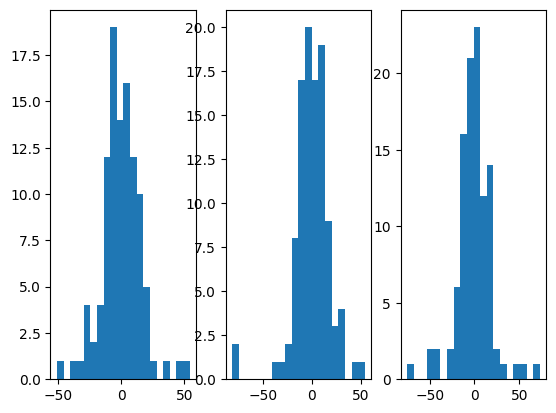

In [7]:
noise_bh = data_bh - np.mean(data_bh,axis=0)
noise_bh = data_bt - np.mean(data_bt,axis=0)
noise_bh = data_lp - np.mean(data_lp,axis=0)
print(noise_bh.shape)


fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].hist(noise_bh[:,0],bins=20)
axs[1].hist(noise_bh[:,1],bins=20)
axs[2].hist(noise_bh[:,2],bins=20)
plt.show()

Moyenne de la PSD :  -42.04853279020326


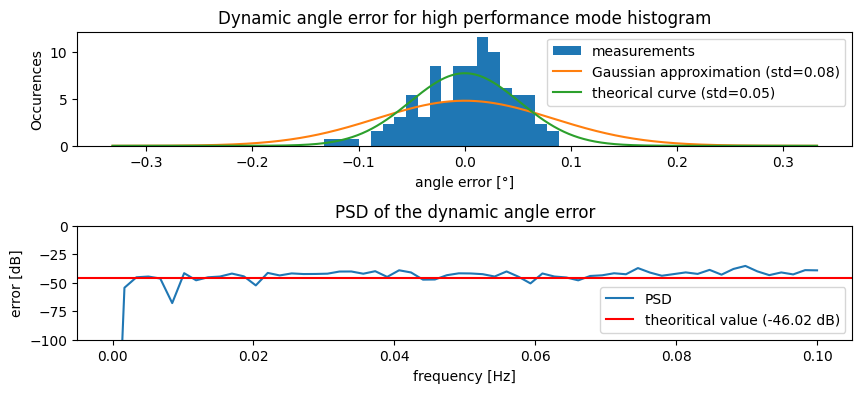

In [8]:
a = 360/(2*np.pi)
theta = (np.arctan((data_hp[:,0]**2+data_hp[:,1]**2)**0.5/data_hp[:,2]))*a
val = theta-np.mean(theta)
noise_hp = (np.sum((theta-np.mean(theta))**2))**0.5/len(theta)
std_hp = np.std(theta-np.mean(theta))
mu = np.mean(theta-np.mean(theta))
x = np.linspace(-4*std_hp,4*std_hp,1000)

fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(10,4)
plt.subplots_adjust(hspace=0.7)
y = 1/(std_hp*(2*np.pi)**0.5)*np.exp(-0.5*((x-mu)/std_hp)**2)
y1 = 1/(0.0515*(2*np.pi)**0.5)*np.exp(-0.5*((x-0)/0.0515)**2)
b = np.mean(theta)
axs[0].hist(theta-np.mean(theta),bins=30, range=[-2*std_hp,2*std_hp], label="measurements", density=True)
axs[0].plot(x,y, label=f"Gaussian approximation (std={std_hp:.2f})")
axs[0].plot(x,y1, label=f"theorical curve (std={0.0515:.2f})")
axs[0].legend()
axs[0].set_title("Dynamic angle error for high performance mode histogram")
axs[0].set_xlabel("angle error [°]")
axs[0].set_ylabel("Occurences")

xdft = np.fft.fft(np.array(val))
xdft = xdft[0:(len(val)//2)]

# Power Spectral Density (PSD)
psdx = (1/(200*(len(val)))) * np.abs(xdft)**2
psdx[1:-2] = 2*psdx[1:-2]

# Moyenne de la Power Spectral Density en dB
moyennePSD = 10*np.log10(np.mean(psdx))

# Quantization noise
quant_noise = (2/200)*(0.0047900390625**2)/12

# Theoretical value PSD
TherP = 10*np.log10(0.05**2/100)

print("Moyenne de la PSD : ", moyennePSD)

# Plot PSD
freq = np.linspace(start=0.0, stop=200/2, num=(len(val))//2)
axs[1].set_title("PSD of the dynamic angle error")
axs[1].plot(1e-3*freq, 10*np.log10(psdx), label='PSD')
axs[1].axhline(y = TherP, color = 'r', linestyle = '-', label=f"theoritical value ({TherP:.2f} dB)")
axs[1].legend()
axs[1].set_xlabel("frequency [Hz]")
axs[1].set_ylabel("error [dB]")
axs[1].set_ylim(-100,0)

plt.savefig("high_perf.pdf", format="pdf")
plt.show()

In [9]:
def retirer_extrema(liste):
    # Trier la liste en ordre croissant
    liste_triee = sorted(liste)
    
    # Calculer le nombre d'éléments à retirer (3 % en bas et 3 % en haut)
    n = len(liste)
    nb_a_retirer = int(n * 0.02)
    
    # Si la liste est trop petite pour retirer 3%, on retourne la liste vide
    if nb_a_retirer == 0:
        return []

    # Retirer les 3 % des plus petites et grandes valeurs
    liste_filtrée = liste_triee[nb_a_retirer:-nb_a_retirer]
    
    return liste_filtrée

5.736874382358406
Moyenne de la PSD :  -33.53989886297122


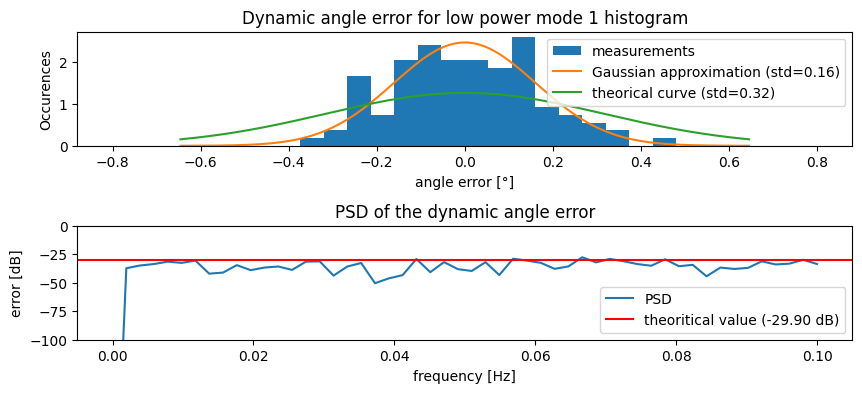

In [10]:
a = 360/(2*np.pi)
theta = (np.arctan((data_lp[:,0]**2+data_lp[:,1]**2)**0.5/data_lp[:,2]))*a
theta2 = retirer_extrema(theta)
print(np.max(np.abs(theta2)))
val = theta-np.mean(theta)
noise_hp = (np.sum((theta2-np.mean(theta2))**2))**0.5/len(theta2)
std_hp = np.std(theta2-np.mean(theta2))
mu = np.mean(theta2-np.mean(theta2))
x = np.linspace(-4*std_hp,4*std_hp,1000)

y = 1/(std_hp*(2*np.pi)**0.5)*np.exp(-0.5*((x-mu)/std_hp)**2)
y1 = 1/(0.315*(2*np.pi)**0.5)*np.exp(-0.5*((x-0)/0.315)**2)
b = np.mean(theta2)

fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(10,4)
plt.subplots_adjust(hspace=0.7)
axs[0].hist(theta2-np.mean(theta2),bins=30, range=[-0.8,0.8], label="measurements",density=True)
axs[0].plot(x,y, label=f"Gaussian approximation (std={std_hp:.2f})")
axs[0].plot(x,y1, label=f"theorical curve (std={0.315:.2f})")
axs[0].legend()
axs[0].set_title("Dynamic angle error for low power mode 1 histogram")
axs[0].set_xlabel("angle error [°]")
axs[0].set_ylabel("Occurences")

xdft = np.fft.fft(np.array(val))
xdft = xdft[0:(len(val)//2)]

# Power Spectral Density (PSD)
psdx = (1/(200*(len(val)))) * np.abs(xdft)**2
psdx[1:-2] = 2*psdx[1:-2]

# Moyenne de la Power Spectral Density en dB
moyennePSD = 10*np.log10(np.mean(psdx))

# Quantization noise
quant_noise = (2/200)*(0.0047900390625**2)/12

# Theoretical value PSD
TherP = 10*np.log10(0.32**2/100)

print("Moyenne de la PSD : ", moyennePSD)

# Plot PSD
freq = np.linspace(start=0.0, stop=200/2, num=(len(val))//2)
axs[1].set_title("PSD of the dynamic angle error")
axs[1].plot(1e-3*freq, 10*np.log10(psdx), label='PSD')
axs[1].axhline(y = TherP, color = 'r', linestyle = '-', label=f"theoritical value ({TherP:.2f} dB)")
axs[1].legend()
axs[1].set_xlabel("frequency [Hz]")
axs[1].set_ylabel("error [dB]")
axs[1].set_ylim(-100,0)
fig.savefig("low_power.pdf", format="pdf")
plt.show()


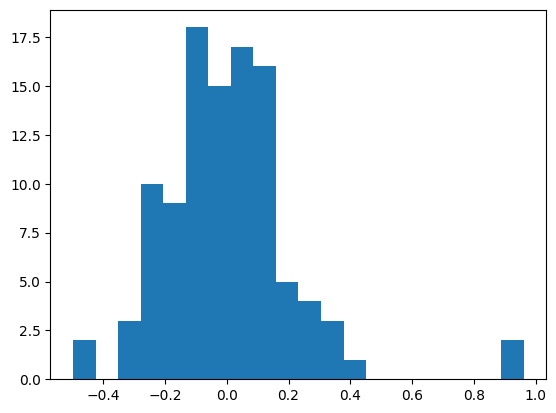

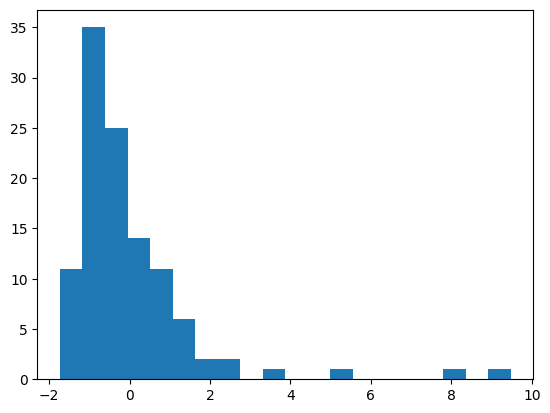

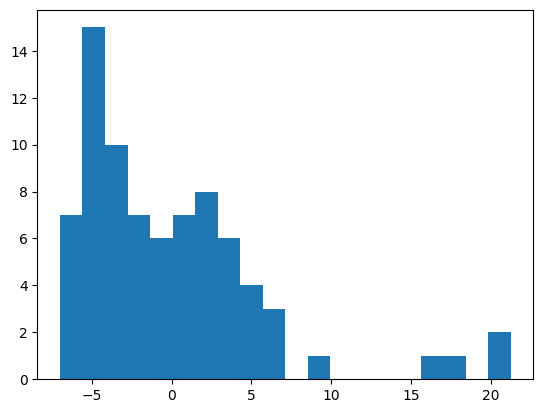

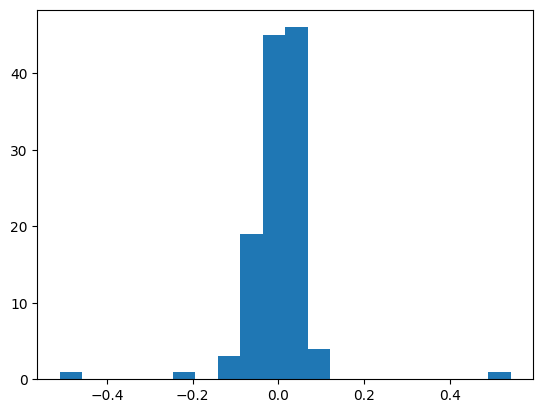

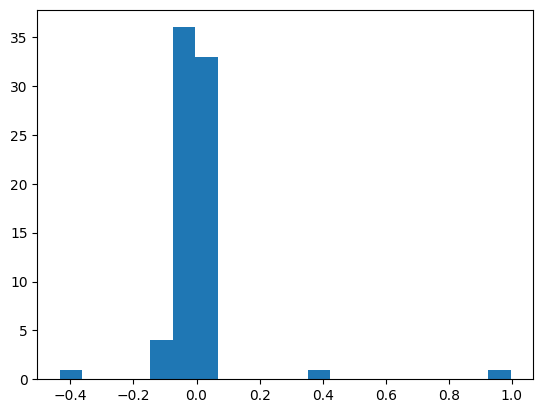

no env :0.021153453777852424	 std : 0.21675839939165584
no env :0.015833224007890292	 std : 0.13803084680167166
1.336016831904283 1.5703620198976476
bruit humain :0.15282378416526263	 std : 1.6028293704337295
bruit table :0.6685663100646518	 std : 5.904617773774202
high perf :0.007570299971107283	 std : 0.08292848122512332


In [11]:
a = 360/(2*np.pi)
theta = (np.arctan((data_lp[:,0]**2+data_lp[:,1]**2)**0.5/data_lp[:,2]))*a
plt.hist(theta-np.mean(theta),bins=20)
noise_lp = (np.sum((theta-np.mean(theta))**2))**0.5/len(theta)
std_lp = np.std(theta-np.mean(theta))

plt.show()
theta = (np.arctan((data_bh[:,0]**2+data_bh[:,1]**2)**0.5/data_bh[:,2]))*a
plt.hist(theta-np.mean(theta),bins=20)
plt.show()
noise_bh = (np.sum((theta-np.mean(theta))**2))**0.5/len(theta)
std_bh = np.std(theta-np.mean(theta))

theta = (np.arctan((data_bt[:,0]**2+data_bt[:,1]**2)**0.5/data_bt[:,2]))*a
plt.hist(theta-np.mean(theta),bins=20)
plt.show()
noise_bt = (np.sum((theta-np.mean(theta))**2))**0.5/len(theta)
std_bt = np.std(theta-np.mean(theta))

theta = (np.arctan((data_hp[:,0]**2+data_hp[:,1]**2)**0.5/data_hp[:,2]))*a
plt.hist(theta-np.mean(theta),bins=20)
plt.show()
noise_hp = (np.sum((theta-np.mean(theta))**2))**0.5/len(theta)
std_hp = np.std(theta-np.mean(theta))

theta = (np.arctan((data_lp4[:,0]**2+data_lp4[:,1]**2)**0.5/data_lp4[:,2]))*a
plt.hist(theta-np.mean(theta),bins=20)
plt.show()
noise_lp4 = (np.sum((theta-np.mean(theta))**2))**0.5/len(theta)
std_lp4 = np.std(theta-np.mean(theta))

print(f"no env :{noise_lp}\t std : {std_lp}")
print(f"no env :{noise_lp4}\t std : {std_lp4}")
print(noise_lp/noise_lp4, (std_lp)/(std_lp4))
print(f"bruit humain :{noise_bh}\t std : {std_bh}")
print(f"bruit table :{noise_bt}\t std : {std_bt}")
print(f"high perf :{noise_hp}\t std : {std_hp}")

## Transfert function

In [13]:
a0 = np.loadtxt('../data/0.log', skiprows=1, delimiter='\t')
a45 = np.loadtxt('../data/45.log', skiprows=1, delimiter='\t')
a675 = np.loadtxt('../data/675.log', skiprows=1, delimiter='\t')
a90 = np.loadtxt('../data/90.log', skiprows=1, delimiter='\t')
a135 = np.loadtxt('../data/135.log', skiprows=1, delimiter='\t')
a180 = np.loadtxt('../data/180.log', skiprows=1, delimiter='\t')

(3,)
-37.06
-83.96
-4.43


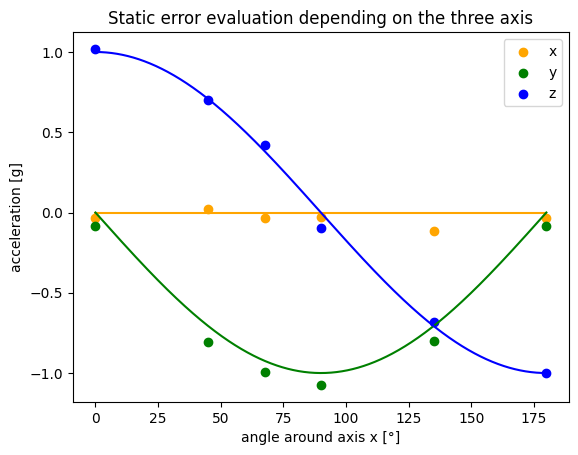

In [14]:
ma0 = np.mean(a0, axis = 0).T
ma45 = np.mean(a45, axis = 0).T
ma675 = np.mean(a675, axis = 0).T
ma90 = np.mean(a90, axis = 0).T
ma135 = np.mean(a135, axis = 0).T
ma180 = np.mean(a180, axis = 0).T
print(ma0.shape)
angle = np.array([0,45,67.5,90,135,180])
acc = np.concatenate((ma0, ma45,ma675,ma90,ma135,ma180))
Amp= 2**12-1
abs = np.linspace(0,180,1000)
z = np.cos(abs/360*2*np.pi)
y = -np.sin(abs/360*2*np.pi)
err_x = (np.mean(acc[0::3]/Amp - 0))
err_y = (np.mean(acc[1::3]/Amp + np.sin(angle/360*2*np.pi)))
err_z = (np.mean(acc[2::3]/Amp - np.cos(angle/360*2*np.pi)))
print(f"{err_x*1000:.2f}")
print(f"{err_y*1000:.2f}")
print(f"{err_z*1000:.2f}")
x = np.zeros(1000)

plt.title("Static error evaluation depending on the three axis")
plt.plot(abs, x , color ='orange')
plt.plot(abs, y , color ='green')
plt.plot(abs, z , color ='blue')
plt.scatter(angle, acc[::3]/Amp,label="x", color = 'orange')
plt.scatter(angle, acc[1::3]/Amp,label="y", color = 'green')
plt.scatter(angle, acc[2::3]/Amp,label="z", color = 'blue')
plt.ylabel("acceleration [g]")
plt.xlabel("angle around axis x [°]")
plt.legend()
plt.savefig("static_error.pdf", format="pdf")
plt.show()

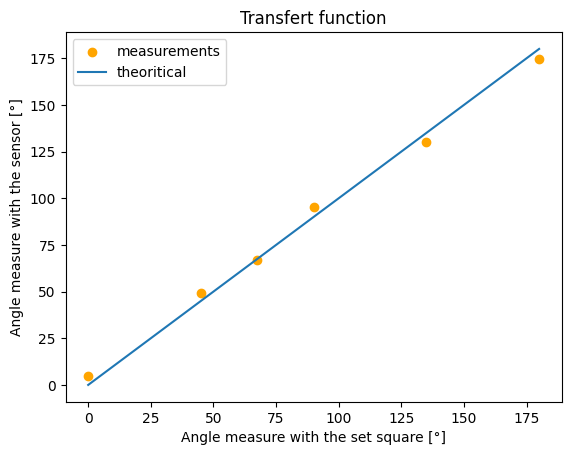

In [15]:

angle0 = np.mean(a0, axis = 0)
theta0 = (np.arctan((angle0[0]**2+angle0[1]**2)**0.5/angle0[2]))*a
angle45 = np.mean(a45, axis = 0)
theta45 = (np.arctan((angle45[0]**2+angle45[1]**2)**0.5/angle45[2]))*a
angle675 = np.mean(a675, axis = 0)
theta675 = (np.arctan((angle675[0]**2+angle675[1]**2)**0.5/angle675[2]))*a
angle90 = np.mean(a90, axis = 0)
theta90 = (np.arctan((angle90[0]**2+angle90[1]**2)**0.5/angle90[2]))*a
angle135 = np.mean(a135, axis = 0)
theta135 = (np.arctan((angle135[0]**2+angle135[1]**2)**0.5/angle135[2]))*a
angle180 = np.mean(a180, axis = 0)
theta180 = (np.arctan((angle180[0]**2+angle180[1]**2)**0.5/angle180[2]))*a

absci = np.linspace(0,180,1000)

plt.scatter([0,45,67.5,90,135,180],[theta0, theta45, theta675, theta90+180, theta135+180, theta180+180], color="orange", label="measurements")
plt.plot(absci,absci, label ="theoritical")
plt.title("Transfert function")
plt.xlabel("Angle measure with the set square [°]")
plt.ylabel("Angle measure with the sensor [°]")
plt.legend()
plt.savefig("H.pdf", format="pdf")
plt.show()